In [109]:
# Importing the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [110]:
# Importing the dataset

dataset = pd.read_csv('../datasets/mushrooms.csv')

In [111]:
# Viewing the first five rows of dataset

dataset.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [112]:
# We can see all the columns have categorical value.
# We have 22 features (independent variables) and a dependent variable (class).

# We will continue with data preprocessing but lets get some insights of the dataset first.

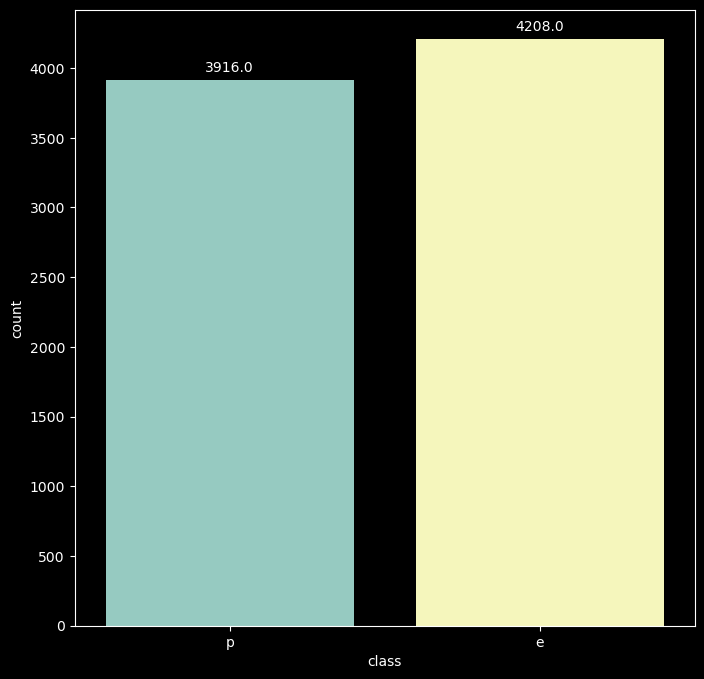

In [113]:
# Visualising the number of mushrooms that fall in each class - p = poisonous, e=edible
plt.style.use('dark_background')
plt.rcParams['figure.figsize']=8,8 
s = sns.countplot(x = "class", data = dataset)
for p in s.patches:
    s.annotate(format(p.get_height(), '.1f'), 
               (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points')
plt.show()

In [114]:
# In the given dataset we have 3916 poisonous mushrooms and 4208 edible mushrooms

In [115]:
features = dataset.columns
print(features)

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')


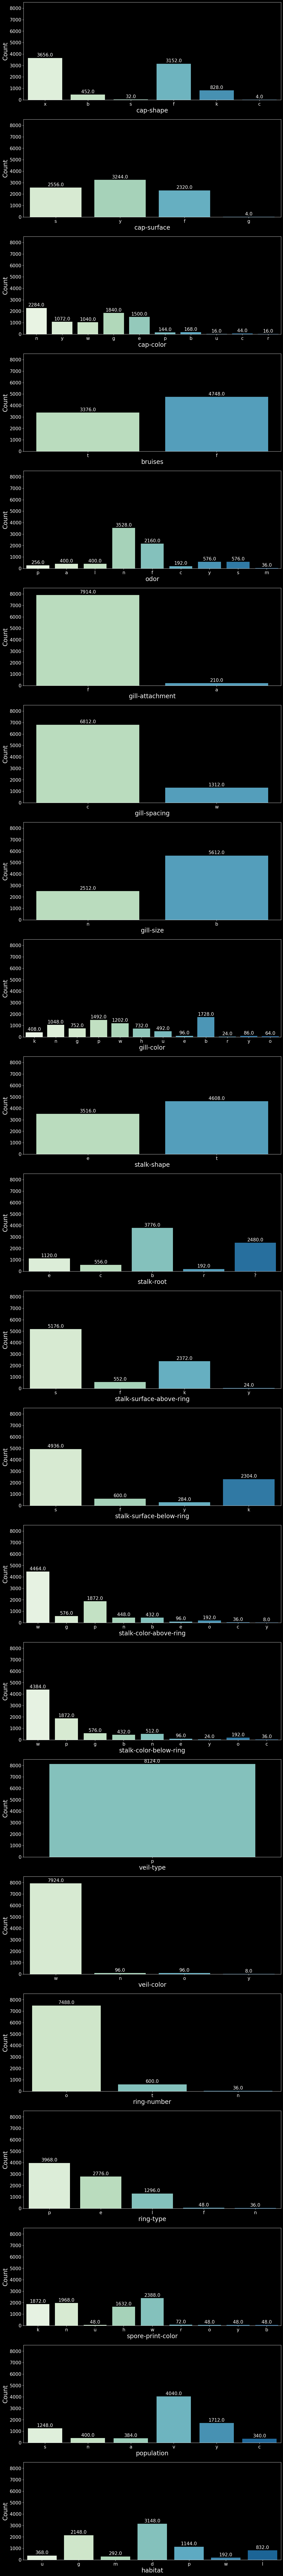

In [116]:
f, axes = plt.subplots(22,1, figsize=(15,150), sharey = True) 
k = 1
for i in range(0,22):
    s = sns.countplot(x = features[k], data = dataset, ax=axes[i], palette = 'GnBu')
    axes[i].set_xlabel(features[k], fontsize=20)
    axes[i].set_ylabel("Count", fontsize=20)
    axes[i].tick_params(labelsize=15)
    k = k+1
    for p in s.patches:
        s.annotate(format(p.get_height(), '.1f'), 
        (p.get_x() + p.get_width() / 2., p.get_height()), 
        ha = 'center', va = 'center', 
        xytext = (0, 9), 
        fontsize = 15,
        textcoords = 'offset points')

In [117]:
# From above graph we can see how many mushrooms belong to each category in each feature

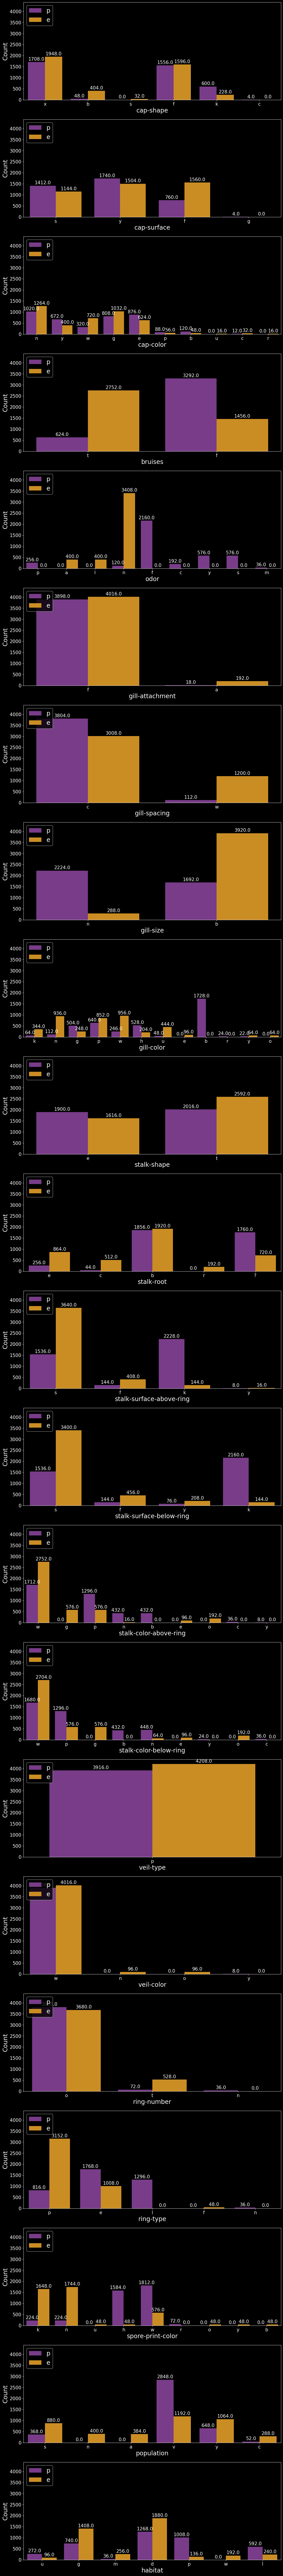

In [118]:
f, axes = plt.subplots(22,1, figsize=(15,150), sharey = True) 
k = 1
for i in range(0,22):
    s = sns.countplot(x = features[k], data = dataset, hue = 'class', ax=axes[i], palette = 'CMRmap')
    axes[i].set_xlabel(features[k], fontsize=20)
    axes[i].set_ylabel("Count", fontsize=20)
    axes[i].tick_params(labelsize=15)
    axes[i].legend(loc=2, prop={'size': 20})
    k = k+1
    for p in s.patches:
        s.annotate(format(p.get_height(), '.1f'), 
        (p.get_x() + p.get_width() / 2., p.get_height()), 
        ha = 'center', va = 'center', 
        xytext = (0, 9), 
        fontsize = 15,
        textcoords = 'offset points')

In [119]:
# From above graph we can see how many mushrooms belong to each category in each feature and among those how many are edible and how many are 
# poisonous mushrooms.

In [120]:
df1 = dataset[dataset['class'] == 'p']
df2 = dataset[dataset['class'] == 'e']
print(df1)
print(df2)

     class cap-shape cap-surface cap-color bruises odor gill-attachment  \
0        p         x           s         n       t    p               f   
3        p         x           y         w       t    p               f   
8        p         x           y         w       t    p               f   
13       p         x           y         w       t    p               f   
17       p         x           s         n       t    p               f   
...    ...       ...         ...       ...     ...  ...             ...   
8114     p         f           y         c       f    m               a   
8116     p         k           y         n       f    s               f   
8117     p         k           s         e       f    y               f   
8118     p         k           y         n       f    f               f   
8122     p         k           y         n       f    y               f   

     gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
0               c         n

In [121]:
# Creating independent and dependent variables
x = dataset.iloc[:,1:].values
y = dataset.iloc[:,0].values

In [122]:
print(x)

[['x' 's' 'n' ... 'k' 's' 'u']
 ['x' 's' 'y' ... 'n' 'n' 'g']
 ['b' 's' 'w' ... 'n' 'n' 'm']
 ...
 ['f' 's' 'n' ... 'b' 'c' 'l']
 ['k' 'y' 'n' ... 'w' 'v' 'l']
 ['x' 's' 'n' ... 'o' 'c' 'l']]


In [123]:
print(len(x[0]))

22


In [124]:
print(y)

['p' 'e' 'e' ... 'e' 'p' 'e']


In [125]:
# Finding missing values

dataset.isna().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [126]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [127]:
# Categories in each feature x
column_list = dataset.columns.values.tolist()
#print(column_list)
for column_name in column_list:
    print(column_name)
    print(dataset[column_name].unique())

class
['p' 'e']
cap-shape
['x' 'b' 's' 'f' 'k' 'c']
cap-surface
['s' 'y' 'f' 'g']
cap-color
['n' 'y' 'w' 'g' 'e' 'p' 'b' 'u' 'c' 'r']
bruises
['t' 'f']
odor
['p' 'a' 'l' 'n' 'f' 'c' 'y' 's' 'm']
gill-attachment
['f' 'a']
gill-spacing
['c' 'w']
gill-size
['n' 'b']
gill-color
['k' 'n' 'g' 'p' 'w' 'h' 'u' 'e' 'b' 'r' 'y' 'o']
stalk-shape
['e' 't']
stalk-root
['e' 'c' 'b' 'r' '?']
stalk-surface-above-ring
['s' 'f' 'k' 'y']
stalk-surface-below-ring
['s' 'f' 'y' 'k']
stalk-color-above-ring
['w' 'g' 'p' 'n' 'b' 'e' 'o' 'c' 'y']
stalk-color-below-ring
['w' 'p' 'g' 'b' 'n' 'e' 'y' 'o' 'c']
veil-type
['p']
veil-color
['w' 'n' 'o' 'y']
ring-number
['o' 't' 'n']
ring-type
['p' 'e' 'l' 'f' 'n']
spore-print-color
['k' 'n' 'u' 'h' 'w' 'r' 'o' 'y' 'b']
population
['s' 'n' 'a' 'v' 'y' 'c']
habitat
['u' 'g' 'm' 'd' 'p' 'w' 'l']


---

In [128]:
# Label encoding y - dependent variable
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [129]:
print(y)

[1 0 0 ... 0 1 0]


In [130]:
# One hot encoding independent variable x

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder()
x = onehotencoder.fit_transform(x).toarray()

In [131]:
print(x[0])

[0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0.
 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


In [132]:
# Splitting the dataset into training set and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=0)

---

In [133]:
# Applying PCA
from sklearn.decomposition import PCA
pca = PCA(n_components = 3)
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)

In [134]:
# Training the Logistic Regression Model on the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0)
classifier.fit(x_train, y_train)

LogisticRegression(random_state=0)

In [135]:
# Predicting the test set
y_pred = classifier.predict(x_test)

In [136]:
# Making the confusion matrix and calculating accuracy score
acscore = []
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test, y_pred)
acscore.append(ac)
print(cm)
print(ac)

[[815  37]
 [157 616]]
0.8806153846153846


---

In [137]:
# Training the Naive Bayes Classification model on the Training set
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(x_train, y_train)

GaussianNB()

In [138]:
# Predicting the test set
y_pred = classifier.predict(x_test)

In [139]:
# Making the confusion matrix and calculating the accuarcy score
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test, y_pred)
acscore.append(ac)
print(cm)
print(ac)

[[833  19]
 [156 617]]
0.8923076923076924


----

In [140]:
# Training the RBF Kernel SVC on the Training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state=0)
classifier.fit(x_train, y_train)

SVC(random_state=0)

In [141]:
# predicting test set
y_pred = classifier.predict(x_test)

In [142]:
# Making the confusion matrix and calculating the accuracy score
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test, y_pred)
acscore.append(ac)
print(cm)
print(ac)

[[815  37]
 [ 24 749]]
0.9624615384615385


---

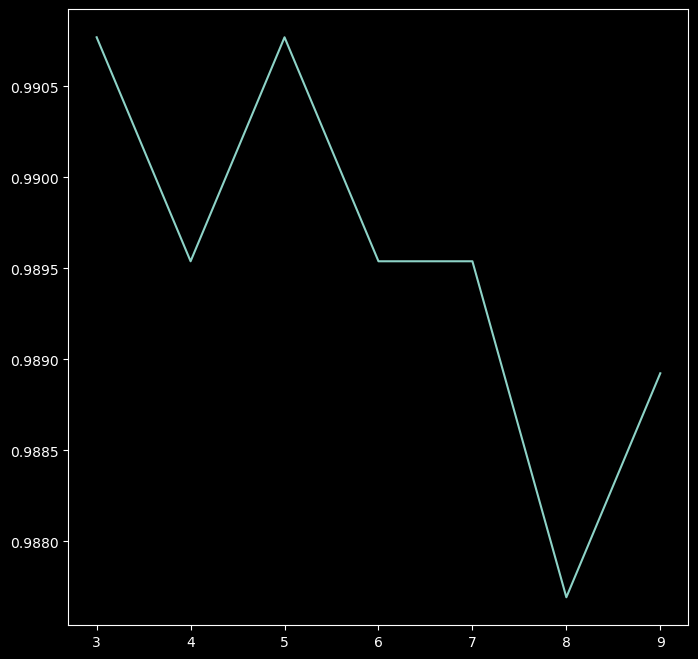

In [143]:
# Calculating the optimum number of neighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
list1 = []
for neighbors in range(3,10,1):
    classifier = KNeighborsClassifier(n_neighbors=neighbors, metric='minkowski')
    classifier.fit(x_train, y_train)
    y_pred = classifier.predict(x_test)
    list1.append(accuracy_score(y_test,y_pred))
plt.plot(list(range(3,10,1)), list1)
plt.show()

In [144]:
# Training the K Nearest Neighbor Classification on the Training set
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')
classifier.fit(x_train, y_train)

KNeighborsClassifier()

In [145]:
# Predicting the test set
y_pred = classifier.predict(x_test)

In [146]:
# Making the confusion matrix and calculating the accuracy score
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test, y_pred)
acscore.append(ac)
print(cm)
print(ac)

[[850   2]
 [ 13 760]]
0.9907692307692307


---

In [147]:
# Training the Decision Tree Classification on the Training set
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state=0)
classifier.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [148]:
# Predicting the test set 
y_pred = classifier.predict(x_test)

In [149]:
# Making the confusion matrix and calculating the accuracy score
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test, y_pred)
acscore.append(ac)
print(cm)
print(ac)

[[848   4]
 [  8 765]]
0.9926153846153846


----

In [150]:
# Training the XGBoost Classification on the Training set
from xgboost import XGBClassifier
classifier = XGBClassifier()
classifier.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [151]:
# Predicting the test set
y_pred = classifier.predict(x_test)

In [152]:
# Making the confusion matrix and calculating the accuracy score
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test, y_pred)
acscore.append(ac)
print(cm)
print(ac)

[[850   2]
 [  8 765]]
0.9938461538461538


----

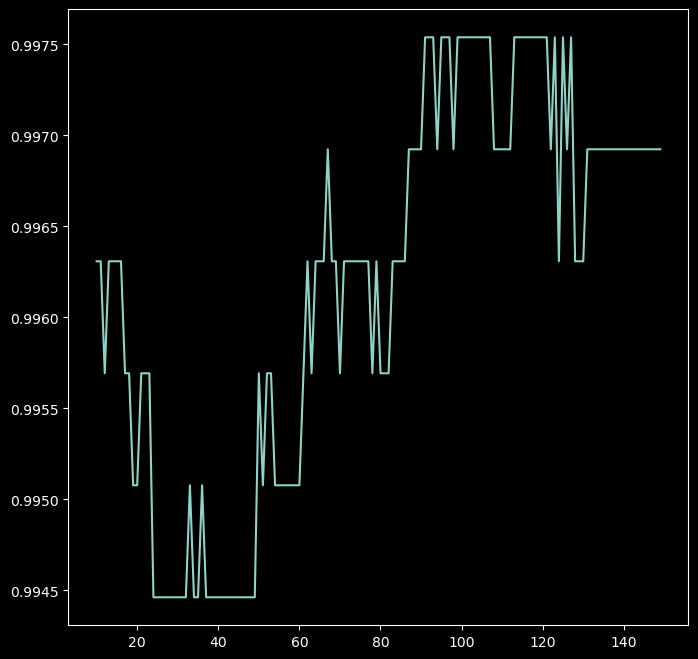

In [153]:
# Finding the optimum number of n_estimators
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
list1 = []
for estimators in range(10,150):
    classifier = RandomForestClassifier(n_estimators = estimators, random_state=0, criterion='entropy')
    classifier.fit(x_train, y_train)
    y_pred = classifier.predict(x_test)
    list1.append(accuracy_score(y_test,y_pred))
#print(mylist)
plt.plot(list(range(10,150)), list1)
plt.show()

In [154]:
# Training the Random Forest Classification on the Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(criterion = 'entropy', random_state=0, n_estimators = 100)
classifier.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', random_state=0)

In [155]:
# Predicting the test set
y_pred = classifier.predict(x_test)

In [156]:
# Making the confusion matrix and accuracy score
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test, y_pred)
acscore.append(ac)
print(cm)
print(ac)

[[850   2]
 [  2 771]]
0.9975384615384615


---

In [157]:
# Printing accuracy score of all the classification models we have applied 
print(acscore)

[0.8806153846153846, 0.8923076923076924, 0.9624615384615385, 0.9907692307692307, 0.9926153846153846, 0.9938461538461538, 0.9975384615384615]


In [158]:
models = ['LogisticRegression','NaiveBayes','KernelSVM','KNearestNeighbors','DecisionTree','XGBoost','RandomForest']

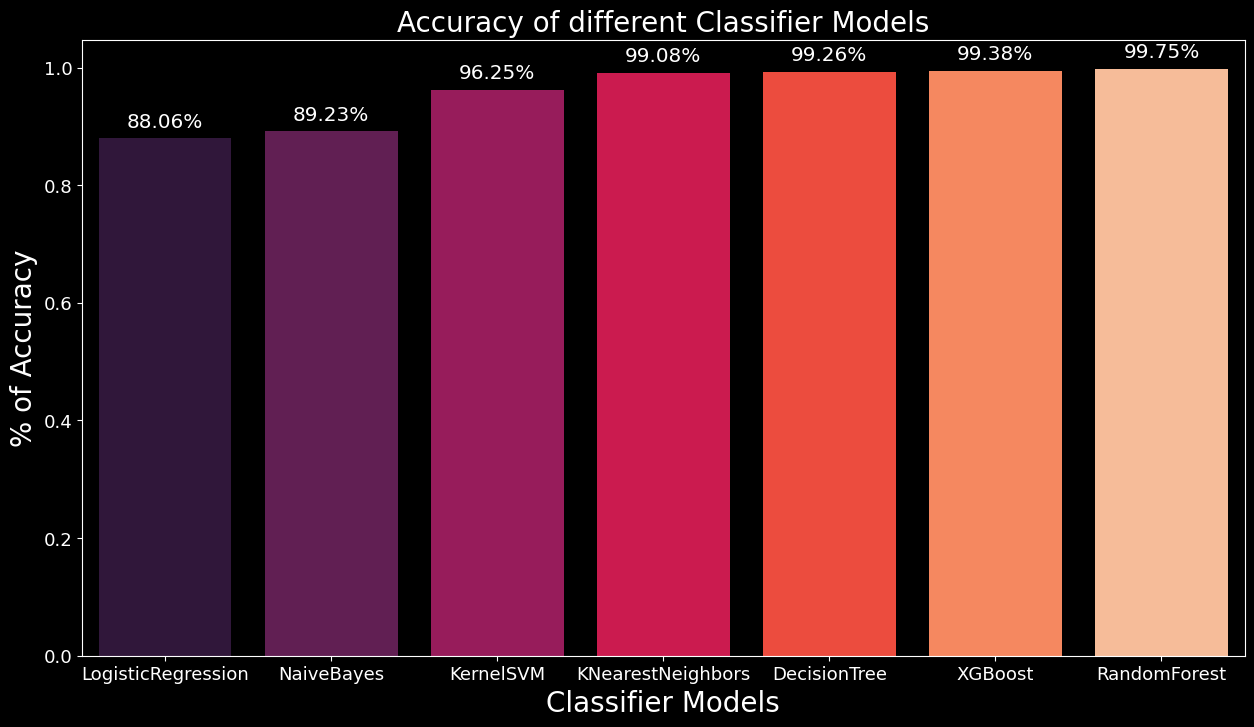

In [159]:
# Visualising the accuracy score of each classification model
plt.rcParams['figure.figsize']=15,8 
plt.style.use('dark_background')
ax = sns.barplot(x=models, y=acscore, palette = "rocket", saturation =1.5)
plt.xlabel("Classifier Models", fontsize = 20 )
plt.ylabel("% of Accuracy", fontsize = 20)
plt.title("Accuracy of different Classifier Models", fontsize = 20)
plt.xticks(fontsize = 13, horizontalalignment = 'center', rotation = 0)
plt.yticks(fontsize = 13)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.2%}', (x + width/2, y + height*1.02), ha='center', fontsize = 'x-large')
plt.show()

In [160]:
# So among all classification model Random Forest Classification has highest accuracy score = 99.75%.